# Pymaceuticals Data Analysis
_____

### Trend Analysis
________

* The treatment that presented the most positive result was Capomulin drug. The Tumor volume decreased over the 45 days of treatment. Something that needs to be taken into consideration is the fact that the standard error also increased in the same proportion. All other treatment presented a negative result where the tumor volume increases over the 45 days in a apparently positive contanst rate.

* Even though Capomulin treatment presented initial positive results, none of the treatments were able to stop the cancer spread. The metastatic spread increased at a constant rate over the 45 days of treatment. 
 
* The Capomulin treatment presented again a better survival rate (around 80%) in comparison with the other treatments.  The treatment using the drug Infubinol presented a survival rate below 50% after 45 days.

* Based on the results presented after 45 days of treatment, only the drug Capomulin presented a good result. Overall the tumor size decrease in 19% but the treatment not showed as effective to stop the cancer spread.

### 1. Dependencies

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### 2. Load Dataframes objects

In [21]:
mouse_drug = pd.read_csv('resources/mouse_drug_data.csv')
mouse_drug.head(3)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn


In [22]:
clinical_trial = pd.read_csv('resources/clinicaltrial_data.csv')
clinical_trial.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [23]:
combined = clinical_trial.merge(right=mouse_drug, how='left', on='Mouse ID')
combined.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [24]:
print(f'Mouse Drug Dataframe : {mouse_drug.shape}')
print(f'Clinical Trial Dataframe : {clinical_trial.shape}')
print(f'Combined Dataframe : {combined.shape}')

Mouse Drug Dataframe : (250, 2)
Clinical Trial Dataframe : (1893, 4)
Combined Dataframe : (1906, 5)


In [25]:
combined['Drug']= combined['Drug'].astype('category')

In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 76.7+ KB


#### 3. Tumor Response to Treatment

In [27]:
columns = ['Drug', 'Timepoint', 'Tumor Volume (mm3)']

tumor_response = combined[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).mean()
tumor_response.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

#### 4. Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

In [28]:
columns = ['Drug', 'Timepoint', 'Tumor Volume (mm3)']

tumor_response_error = combined[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).sem()
tumor_response_error.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

#### 5. Minor Data Munging to Re-Format the Data Frames

In [29]:
tumor_response = tumor_response.unstack(level = 0)
tumor_response.columns = tumor_response.columns.get_level_values(1)

tumor_response.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [30]:
tumor_response_error = tumor_response_error.unstack(level=0)
tumor_response_error.columns = tumor_response_error.columns.get_level_values(1)

tumor_response_error.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


### 6. Generate the Plot (with Error Bars)

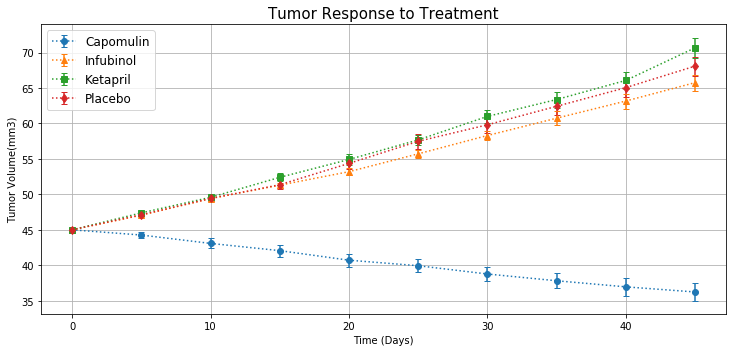

In [36]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)

ax.set_title('Tumor Response to Treatment', fontsize=15)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume(mm3)')
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

markers = ['o', '^', 's', 'd']

i = 0
for col in tumor_response[columns].columns:
    ax.errorbar(tumor_response.index,
                tumor_response[col],
                tumor_response_error[col],
                linestyle=':',
                marker = markers[i],
                capthick = 1,
                capsize = 3)
    i = i + 1

legend = ax.legend(loc='upper left', fontsize='large', frameon=True)

ax.grid(True)
fig.tight_layout()
fig.savefig('output/tumor_response_treatement.png')

#### 7. Metastatic Response to Treatment

In [37]:
columns = ['Drug', 'Timepoint', 'Metastatic Sites']

metastatic_response = combined[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).mean()
metastatic_response.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

#### 8. Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

In [38]:
columns = ['Drug', 'Timepoint', 'Metastatic Sites']

metastatic_response_error = combined[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).sem()
metastatic_response_error.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

#### 9. Minor Data Munging to Re-Format the Data Frames

In [39]:
metastatic_response = metastatic_response.unstack(level = 0)
metastatic_response.columns = metastatic_response.columns.get_level_values(1)

metastatic_response.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [40]:
metastatic_response_error = metastatic_response_error.unstack(level = 0)
metastatic_response_error.columns = metastatic_response_error.columns.get_level_values(1)

metastatic_response_error.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


#### 10. Generate the Plot (with Error Bars)

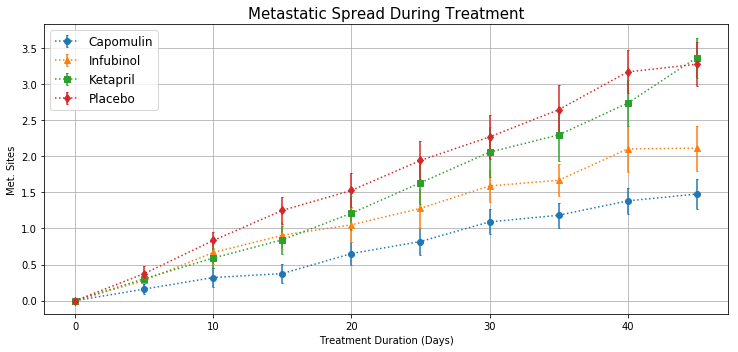

In [41]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)

ax.set_title('Metastatic Spread During Treatment', fontsize=15)
ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Met. Sites')
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)


markers = ['o', '^', 's', 'd']

i = 0
for col in metastatic_response[columns].columns:
    ax.errorbar(metastatic_response.index,
                metastatic_response[col],
                metastatic_response_error[col],
                linestyle=':',
                marker = markers[i],
                capthick = 1,
                capsize = 1)
    i = i + 1

legend = ax.legend(loc='upper left', fontsize='large', frameon=True)

ax.grid(True)
fig.tight_layout()
fig.savefig('output/metastatic_spread_treatement.png')

#### 11. Survival Rates


In [42]:
columns = ['Drug', 'Timepoint', 'Mouse ID']

survival_rates = combined[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).count()
survival_rates.rename(columns={'Mouse ID' : 'Mouse Count'}, inplace=True)
survival_rates.head(5)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

#### 12. Minor Data Munging to Re-Format the Data Frames

In [43]:
survival_rates = survival_rates.unstack(level = 0)
survival_rates.columns = survival_rates.columns.get_level_values(1)

survival_rates.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


#### 13. Generate the Plot (Accounting for percentages)

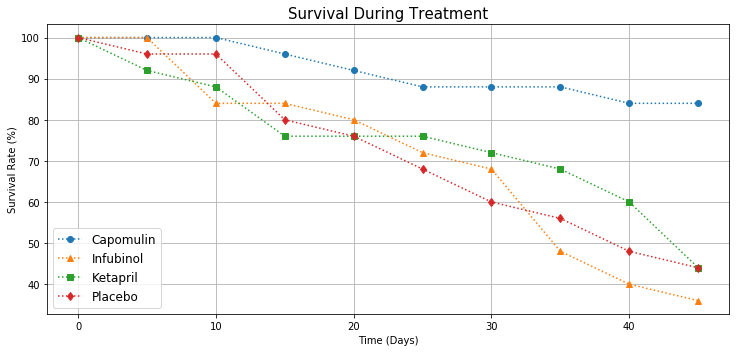

In [44]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)

ax.set_title('Survival During Treatment', fontsize=15)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

markers = ['o', '^', 's', 'd']

i = 0
for col in survival_rates[columns].columns:
    ax.plot(survival_rates.index,
            (survival_rates[col]/survival_rates.loc[0, col] * 100),
            linestyle=':',
            marker = markers[i]
           )
    i = i + 1

legend = ax.legend(loc='best', fontsize='large', frameon=True,)

ax.grid(True)
fig.tight_layout()
fig.savefig('output/survival_rates.png')

#### 14. Summary Bar Graph

In [45]:
tumor_change = (tumor_response.loc[45,:] - tumor_response.loc[0,:]) / tumor_response.loc[0,:] * 100

tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

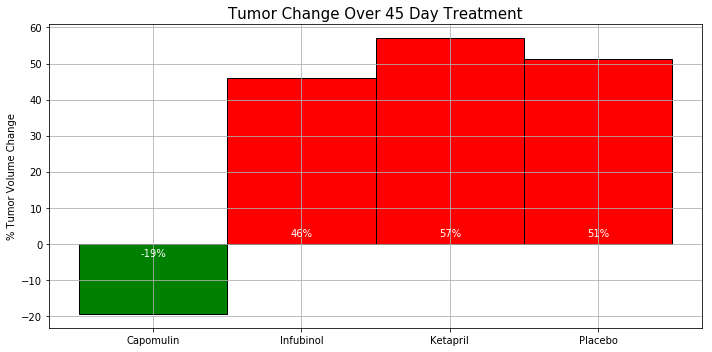

In [46]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Tumor Change Over 45 Day Treatment', fontsize=15)
ax.set_ylabel('% Tumor Volume Change')

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.bar(range(4),
       tumor_change[columns],
       color = ['red' if tumor_change[col] > 0 else 'green' for col in tumor_change[columns].index],
       align = 'center',
       edgecolor='black',
       width = 1.0
      )

plt.xticks(range(len(tumor_change[columns].index)), tumor_change[columns].index)

i = 0

for item in tumor_change[columns]:
    if item < 0:
        location = -3.5
    else:
        location = 2
    
    ax.text(i, location, str(int(item)) + '%', ha = 'center', color = 'white')
    i = i + 1

ax.grid(True)
fig.tight_layout()

fig.savefig('output/summary_bar.png')